# OCAMI Algebra Seminar Demonstration

In [2]:
load("tors_lattice.py")

## Input your poset of torsion classes!

Input using SageMath's `Poset` function.

In [3]:
poset = Poset( ([1,2,3,4,5], [[1,2], [2,5], [1,3],[3,4],[4,5]] ) )

### Important remark
The directions of Hasse arrows in SageMath is **opposite** to our convention!

Input using Jan Geuenich's [String Applet](https://www.math.uni-bielefeld.de/~jgeuenich/string-applet/) and my [String Applet to Sage converter](https://github.com/haruhisa-enomoto/StringApplet-to-SageMath-converter)

In [5]:
load("converter.py")

In [41]:
poset = Poset(SAtoSage("data.tex"))

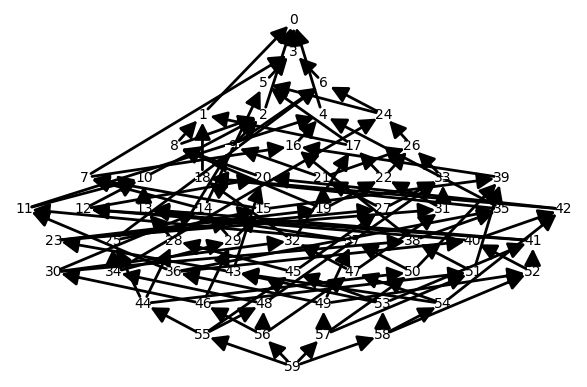

In [6]:
myshow(poset)

## Enjoy!

Construct the lattice of torsion classes by `TorsLattice(poset)`

The lattice of wide subcats: `tors.wide_lattice()`

The lattice of ICE-closed subcats: `tors.ice_lattice()`

The poset of torsion hearts: `tors.heart_poset()`

$\Delta(\Lambda)$: `tors.s_tau_tilt_complex()`

## Path algebra

$\mathsf{tors} kQ$ for a Dynkin quiver $Q$ is given by e.g. Cambiran lattice [Ingalls-Thomas].

Name `W = WeylGroup(["A3"])`, and then SageMath can construct a Cambrian lattice associated with a source sequence:

`W.cambrian_lattice((1,3,2))` is $Q : 1 \to 2 \leftarrow 3$.

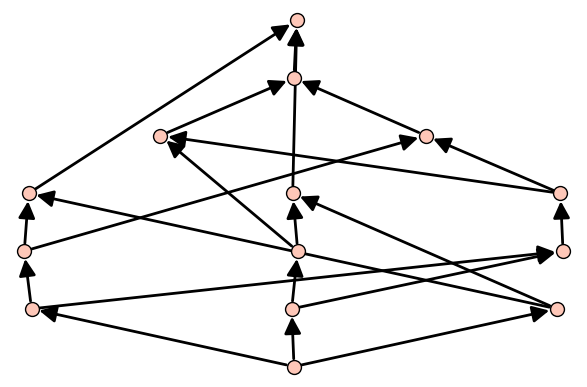

In [75]:
myshow(tors, label = False)

Let's check that $\mathsf{wide} kQ$ is isomorphic to the so-called **non-crossing partition lattice**.

It's given by `posets.NoncrossingPartitions(W)`.

In [79]:
NC =posets.NoncrossingPartitions(W)

In [78]:
wide = tors.wide_lattice()

In [80]:
wide.is_isomorphic(NC)

True

Now consider $\Delta(kQ)$. It should be isomorphic to:

`ClusterComplex(["A3"])`

## Preprojective algebra

$\mathsf{tors} \Pi$ is given by the right weak order of the Weyl group [Mizuno].

Let's google how to input this!

Compare the lattice of wide subcategories and shard intersection order, given by `W.shard_poset()`

Guess what is $\Delta(\Pi)$. Maybe compute some invariants like f-vectors, and search it in [OEIS](https://oeis.org/).

## Lattice property for wide subcategories

Let's see what kind of properties the lattice of wide subcategories has.

In [101]:
wide.is_rank_symmetric()

True

In [42]:
wide.is_complemented()

True

In [102]:
wide.is_relatively_complemented()

True

In [103]:
wide.is_sperner()

True

In [45]:
wide.is_eulerian()

False

## Counterexample for Sakai's conjecture

The number of Hasse arrows in the poset of ICE-closed subcats is equal to the number of indecomposable Ext-projective objects!

Suppose you have `tors`. Then the next code check this conjecture.

In [43]:
ice = tors.ice_lattice()
ice_itv = {itv for itv in tors.all_itvs() if tors.is_ice_itv(itv)} # the set of all ICE intervals

for itv in ice_itv: 
    num_proj = tors.number_of_projs(itv)
    itv_brick = tors.bricks(itv) 
    num_Hasse_arrows = len(ice.lower_covers(itv_brick))
    if num_proj != num_Hasse_arrows:
        print ("Not True!!")
        break
else:
    print("The conjecture is True in this case.")

Not True!!
